In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("Twitter Sentiments.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Preprocessing the text data

In [22]:
## removes pattern in the input text
def remove_pattern(input_text,pattern):
    input_text = re.sub(pattern,"",input_text)
    #r = re.findall(pattern,input_text)
    return input_text

In [30]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],'@[\w]*')

In [31]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [32]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [33]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [34]:
# remove short word
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

In [35]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish drags hi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit can use cause they don...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [36]:
# tokenization
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

In [37]:
tokenized_tweet

0        [when, father, dysfunctional, and, selfish, dr...
1        [thanks, for, #lyft, credit, can, use, cause, ...
2                                  [bihday, your, majesty]
3               [#model, love, take, with, all, the, time]
4                  [factsguide, society, now, #motivation]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [see, nina, turner, the, airwaves, trying, wra...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                       [thank, you, for, you, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [38]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [40]:
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [41]:
tokenized_tweet

0        [when, father, dysfunct, and, selfish, drag, h...
1        [thank, for, #lyft, credit, can, use, caus, th...
2                                  [bihday, your, majesti]
3               [#model, love, take, with, all, the, time]
4                        [factsguid, societi, now, #motiv]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [see, nina, turner, the, airwav, tri, wrap, he...
31959    [listen, sad, song, monday, morn, otw, work, sad]
31960    [#sikh, #templ, vandalis, #calgari, #wso, cond...
31961                       [thank, you, for, you, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [42]:
# Combining the words back to sentences
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [43]:
df['clean_tweet'] = tokenized_tweet

In [44]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct and selfish drag hi kid i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit can use caus they don o...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time
4,5,0,factsguide: society now #motivation,factsguid societi now #motiv


## EDA

In [47]:
vocabulary = ' '.join([sentence for sentence in df['clean_tweet']])

In [50]:
vocabulary

'when father dysfunct and selfish drag hi kid into hi dysfunct #run thank for #lyft credit can use caus they don offer wheelchair van pdx #disapoint #getthank bihday your majesti #model love take with all the time factsguid societi now #motiv huge fan fare and big talk befor they leav chao and pay disput when they get there #allshowandnogo camp tomorrow danni the next school year the year for exam can think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl won love the land #allin #cav #champion #cleveland #clevelandcavali welcom here #gr #ireland consum price index mom climb from previou may #blog #silver #gold #forex are selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love get see daddi today day #gettingf #cnn call #michigan middl school build the wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank for h

In [53]:
# visualize the frequent words
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state = 42,max_font_size=100).generate(vocabulary)

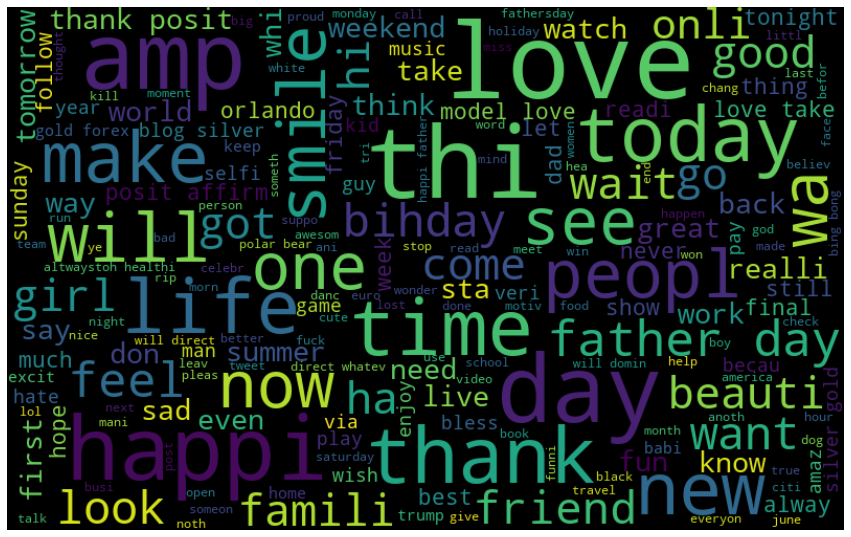

In [68]:
# plot the graph
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
# visualize frequent positive words
positive_words = ' '.join([sentence for sentence in df[df['label']==0]['clean_tweet']])
word_cloud_positive = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(positive_words)

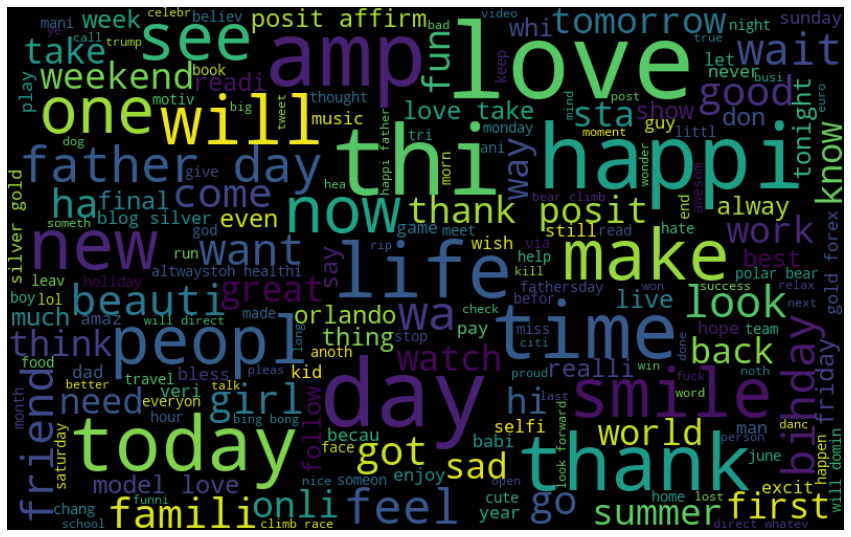

In [69]:
# plot the graph
plt.figure(figsize=(15,10))
plt.imshow(word_cloud_positive,interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
# visualize frequent negative words
negative_words = " ".join([sentence for sentence in df[df['label']==1]['clean_tweet']])
negative_words

'#cnn call #michigan middl school build the wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin retweet you agre lumpi say prove lumpi unbeliev that the centuri need someth like thi again #neverump #xenophobia let fight against #love #peac the white establish can have blk folx run around love themselv and promot our great hey white peopl you can call peopl white #race #ident #med how the #altright use amp insecur lure men into #whitesupremaci not interest #linguist that doesn address #race amp racism about #power #raciolinguist bring whi not mock obama for be black #brexit #peopl aren protest #trump becaus #republican won they becaus trump ha fuher amp ye when you call #michelleobama gorilla becaus racist have long thought black peopl bet the smaller hand show barri probabl lie about be whi hi #knick game suck more than hi #golf you point one finger million are point right back you #jewishsupremacist you might libtard #libtard #sjw #

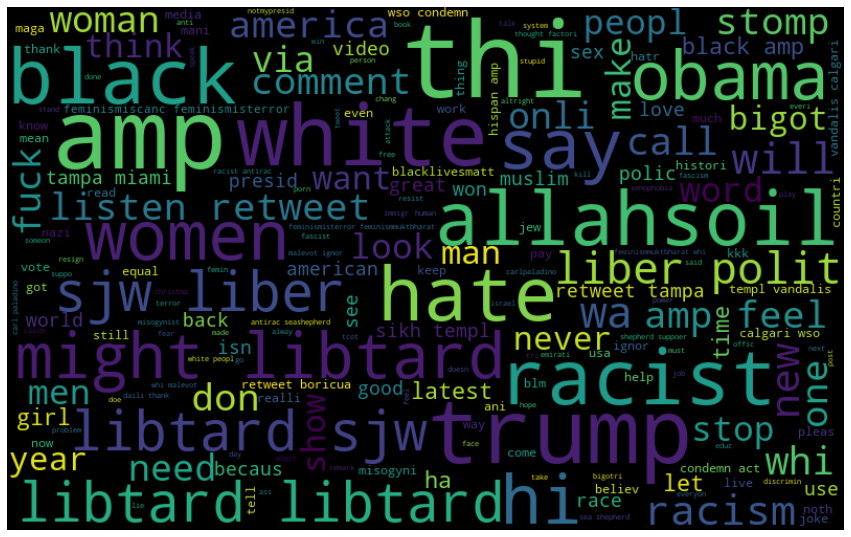

In [75]:
word_cloud_negative = WordCloud(width=800,height = 500,random_state=42,max_font_size=100).generate(negative_words)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud_negative,interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [80]:
# extract the hashtag
def hashtag_extract(tweet):
    hashtags = []
    for sentence in tweet:
        ht = re.findall(r"#(\w+)",sentence)
        hashtags.append(ht)
    return hashtags

In [82]:
# extract hashtag from non racist/sexist tweets
ht_positive = hashtag_extract(df[df['label']==0]['clean_tweet'])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 

In [84]:
# extract hashtag from racist/sexist tweets
ht_negative = hashtag_extract(df[df['label']==1]['clean_tweet'])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [85]:
ht_positive[:10]

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr']]

In [86]:
ht_negative[:10]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist']]

In [87]:
## unnest List
ht_positive = sum(ht_positive,[])
ht_positive       

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughiseno

In [88]:
## unnest List
ht_negative = sum(ht_ht_negative,[])
ht_negative

NameError: name 'ht_ht_negative' is not defined